**Description of features from DrivenData competition page:**


- geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
- count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
- age (type: int): age of the building in years.
- area_percentage (type: int): normalized area of the building footprint.
- height_percentage (type: int): normalized height of the building footprint.
- land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
- foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
- roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
- ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
- other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
- position (type: categorical): position of the building. Possible values: j, o, s, t.
- plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
- has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
- has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
- has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
- has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
- has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
- has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
- has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
- has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
- has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
- has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
- has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
- legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
- count_families (type: int): number of families that live in the building.
- has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
- has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
- has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
- has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
- has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
- has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
- has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
- has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
- has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
- has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
- has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

In [1]:
#importing what is needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import category_encoders as ce #from here: https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline
import seaborn as sns

In [2]:
training_features = pd.read_csv('Data/train_values.csv')

training_features.head(5)
training_features.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']


In [4]:
training_labels = pd.read_csv('Data/train_labels.csv')

training_labels.head(5)
training_labels.building_id.size == training_features.building_id.size

True

/Users/francescaaudia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


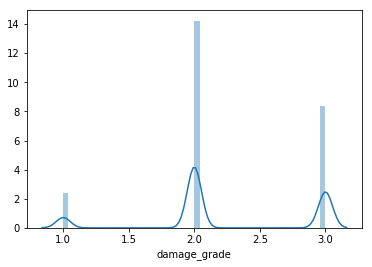

In [5]:
sns.distplot(training_labels.damage_grade)

---
Checking the data below for anything malformed

-----

In [6]:
training_features.shape[0] == training_features.building_id.size

True

In [7]:
#using this for all the geo_level checks, replacing geo_level_x and range as appropriate

geo_level_vals = training_features.geo_level_3_id.unique()
permissible = list(range(0, 12568))

for i in geo_level_vals:
    if i not in permissible:
        print(i) 

In [8]:
training_features.count_floors_pre_eq.unique()
training_features.age.unique()
training_features.area_percentage.unique()
training_features.height_percentage.unique()
training_features.land_surface_condition.unique()
training_features.count_families.unique()

seq = ['a', 'r', 'v', 'w']
filtered = filter(lambda x: x not in training_features.legal_ownership_status.unique(), seq) #using this for all the categorical checks, just replacing seq

if len(list(filtered)) != 0:
    print('check')
    

In [9]:
binary_features = ['has_superstructure_adobe_mud', 
                    'has_superstructure_mud_mortar_stone', 
                    'has_superstructure_stone_flag', 
                    'has_superstructure_cement_mortar_stone',
                    'has_superstructure_mud_mortar_brick',
                    'has_superstructure_cement_mortar_brick',
                    'has_superstructure_timber',
                    'has_superstructure_bamboo',
                    'has_superstructure_rc_non_engineered',
                    'has_superstructure_rc_engineered',
                    'has_superstructure_other',
                    'has_secondary_use',
                    'has_secondary_use_agriculture',
                    'has_secondary_use_hotel',
                    'has_secondary_use_rental',
                    'has_secondary_use_institution',
                    'has_secondary_use_school',
                    'has_secondary_use_industry',
                    'has_secondary_use_health_post',
                    'has_secondary_use_gov_office',
                    'has_secondary_use_use_police',
                    'has_secondary_use_other']

def check_binary(feature_list):
    for i in feature_list:
        print(training_features[i].unique())
        
check_binary(binary_features)

[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


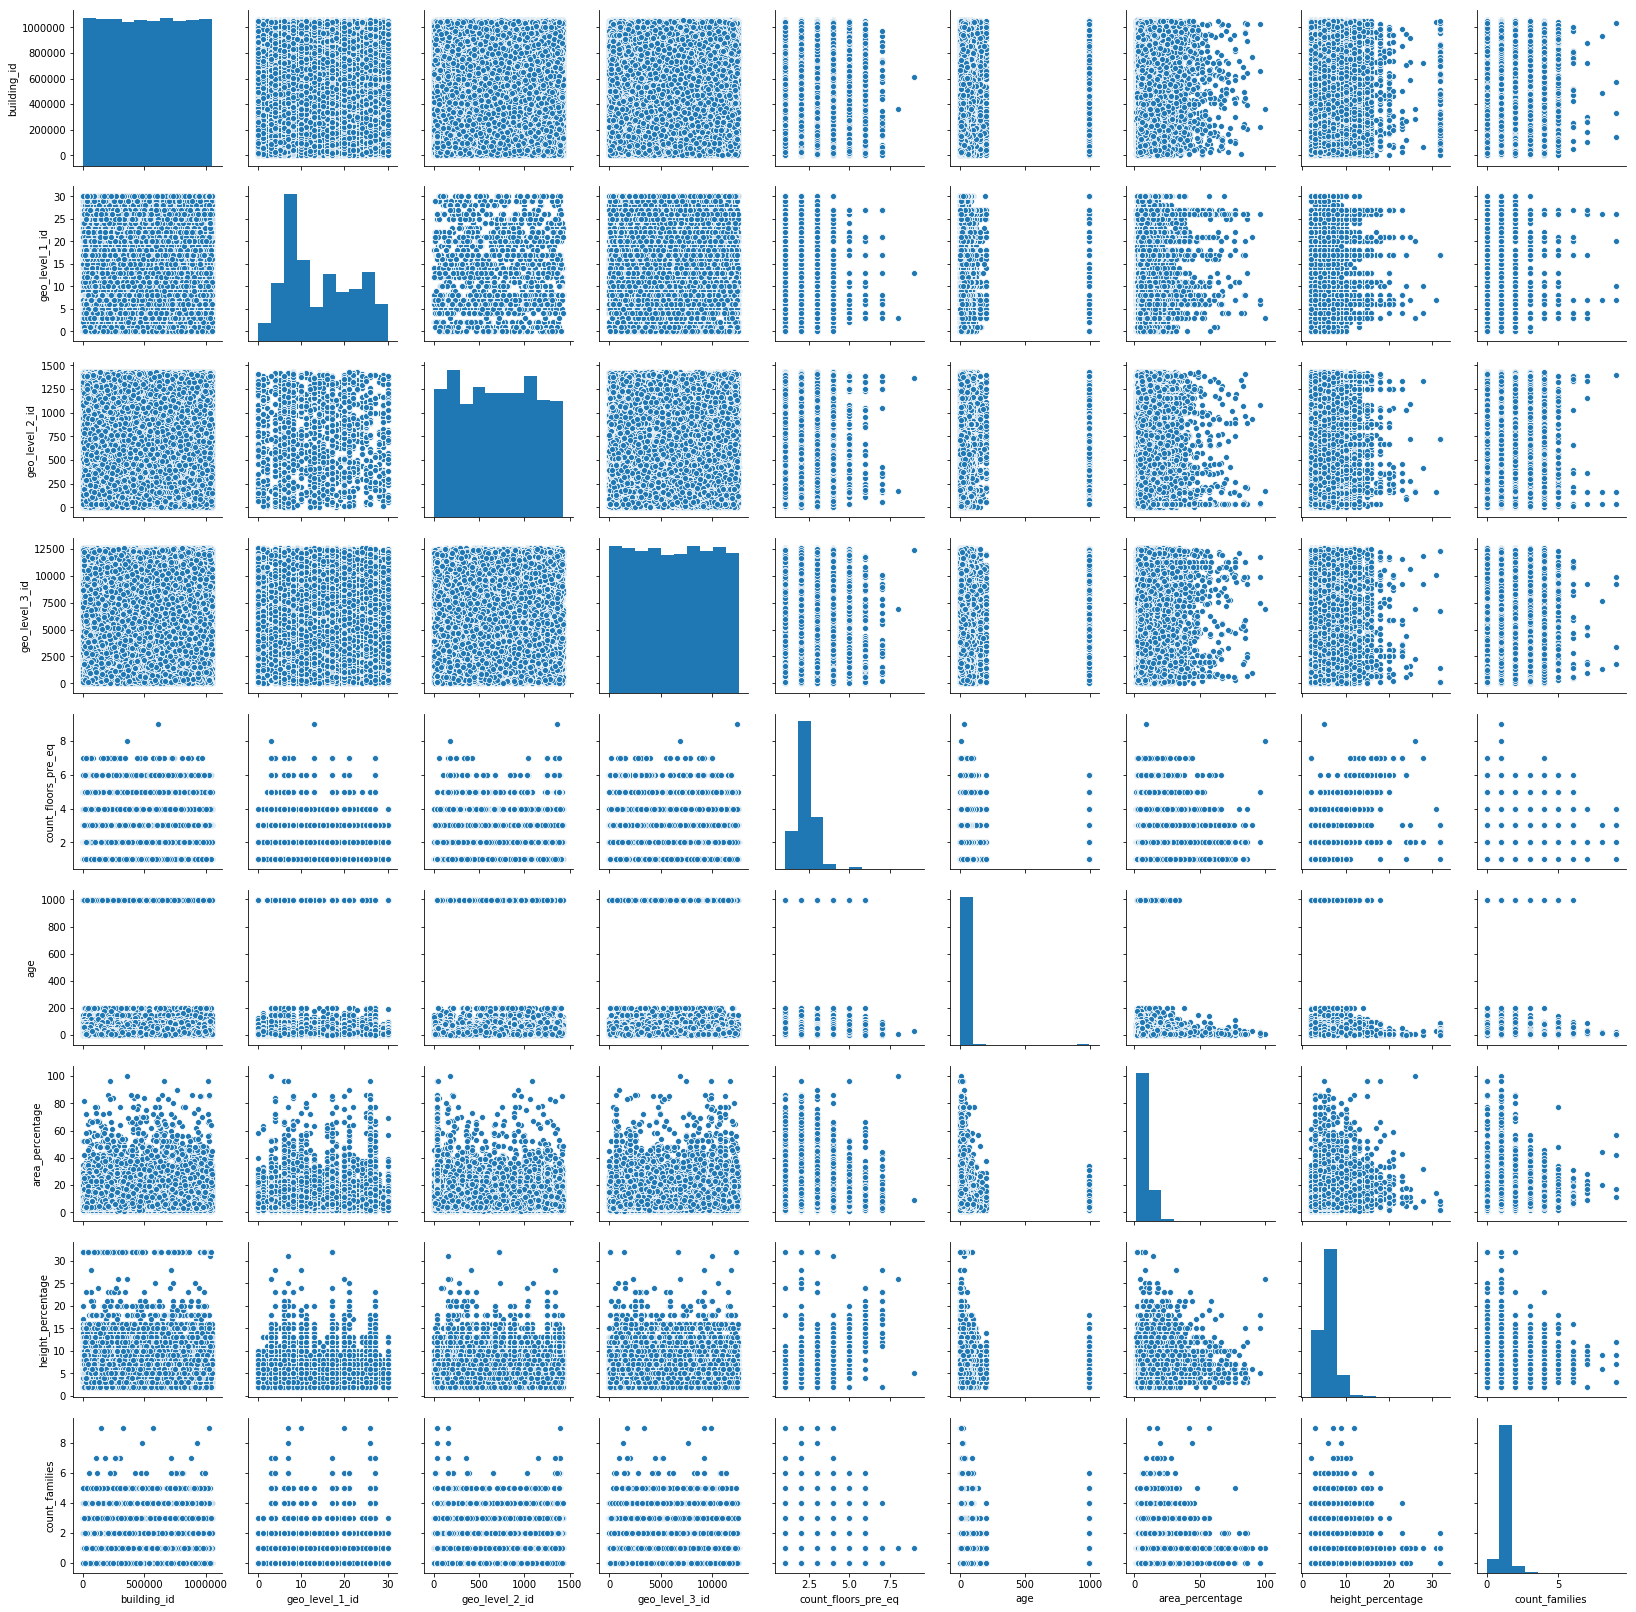

In [11]:
non_cat_features = []
for c in training_features:
    if training_features[c].dtype == 'int64':
        if c not in binary_features:
            non_cat_features.append(c)


sns.pairplot(training_features[non_cat_features])

All data features have been checked and nothing appears to be malformed - there are no missing values, and all values are expected (i.e., they meet the parameters set in the description for each feature).

The next step is to turn unordered categorical values features into numeric features (using one hot encoding) so that the model can use these features, as well as split data into training & testing

**Model fitting below**

In [12]:
X = training_features.iloc[:,1:]
y = training_labels.damage_grade

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.fit_transform(X_test)

In [13]:
#using unrefined data; see if need to redo feature engineering
rfc = RandomForestClassifier(random_state=2000, n_estimators=500)

rfc.fit(X_train_ohe, y_train) 
y_pred_rfc = rfc.predict(X_test_ohe)
print(y_pred_rfc)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfc)))
print(metrics.f1_score(y_test, y_pred_rfc, average='micro'))

[3 2 2 ... 3 2 2]
0.5663003378069763
0.6884557088313732


In [14]:
df = pd.DataFrame({'feature':X_train_ohe, 'importance':rfc.feature_importances_})
df[df.importance > 0.01]

,feature,importance
0,"(g, e, o, _, l, e, v, e, l, _, 1, _, i, d)",0.134600
1,"(g, e, o, _, l, e, v, e, l, _, 2, _, i, d)",0.134599
2,"(g, e, o, _, l, e, v, e, l, _, 3, _, i, d)",0.153425
3,"(c, o, u, n, t, _, f, l, o, o, r, s, _, p, r, ...",0.016048
4,"(a, g, e)",0.122863
5,"(a, r, e, a, _, p, e, r, c, e, n, t, a, g, e)",0.112288
6,"(h, e, i, g, h, t, _, p, e, r, c, e, n, t, a, ...",0.055779
10,"(f, o, u, n, d, a, t, i, o, n, _, t, y, p, e, ...",0.014799
19,"(g, r, o, u, n, d, _, f, l, o, o, r, _, t, y, ...",0.010236
42,"(h, a, s, _, s, u, p, e, r, s, t, r, u, c, t, ...",0.013763


In [15]:
#using only features that appeared to have some importance
refined_features_rfc = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'position', 'count_families']

X_rfc = training_features[refined_features_rfc]
y_rfc = training_labels.damage_grade

X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X_rfc, y_rfc, test_size=.2)

ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe_rfc = ohe.fit_transform(X_train_rfc)
X_test_ohe_rfc = ohe.fit_transform(X_test_rfc)

In [16]:
#using only features that appeared to have some importance
rfc_refined = RandomForestClassifier(random_state=2000, n_estimators=500)
rfc_refined.fit(X_train_ohe_rfc, y_train_rfc) 
y_pred_rfc_refined = rfc_refined.predict(X_test_ohe_rfc)

In [17]:
print(y_pred_rfc_refined)
print(np.sqrt(metrics.mean_squared_error(y_test_rfc,y_pred_rfc_refined)))
print(metrics.f1_score(y_test_rfc, y_pred_rfc_refined, average='micro'))

[2 2 2 ... 2 3 2]
0.5698129399337923
0.6963220199151974


**Submitting via CSV**

In [18]:
test_vals = pd.read_csv('Data/test_values.csv')
submission = pd.read_csv('submission_format.csv', index_col='building_id')

In [19]:
X_test_vals_final = test_vals[refined_features_rfc]

ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)

X_test_vals_final_ohe = ohe.fit_transform(X_test_vals_final)
y_test_vals_final = rfc_refined.predict(X_test_vals_final_ohe)

y_test_vals_final

array([3, 2, 3, ..., 2, 2, 2])

In [20]:
my_submission = pd.DataFrame(data=y_test_vals_final,
                             columns=submission.columns,
                             index=submission.index)

my_submission

,damage_grade
building_id,
300051,3
99355,2
890251,3
745817,1
421793,3
871976,2
691228,2
896100,3
343471,2


In [21]:
my_submission.to_csv('submission.csv')